1. Learning rate  
    - large learning rate : overshooting  
    - small learning rate : takes too long, stops at local minimum  
2. Data preprocessing  
3. Overfitting  
    - More training data  
    - Regularization

### lab 07-1 learning rate and evaluation

In [24]:
import tensorflow as tf

In [25]:
tf.set_random_seed(777) # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],
         [3,1,2],
         [3,3,4]]
y_test = [[0,0,1],
         [0,0,1],
         [0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduct_sum(exp(logits),dim)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Coreect prediction Test model
prediction = tf.argmax(hypothesis,1)
is_correct = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    # predict
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test}))
    
    # Calculate the accuracy
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))

0 5.8089976 [[-0.19632228 -1.220749    0.1588957 ]
 [-0.17167972 -0.65690064  0.47665888]
 [ 0.10662136  1.1824698  -0.09887639]]
1 2.3408751 [[-0.17383566 -1.1944515   0.11011147]
 [-0.01688144 -0.5149655   0.17992541]
 [ 0.26038107  1.3139198  -0.38408604]]
2 1.0000141 [[-0.16864993 -1.209269    0.11974332]
 [ 0.05451432 -0.5900049   0.1835691 ]
 [ 0.33994037  1.2201968  -0.36992246]]
3 0.92962295 [[-1.8655542e-01 -1.2006503e+00  1.2903014e-01]
 [ 1.1226237e-03 -5.3850079e-01  1.8545668e-01]
 [ 2.9587930e-01  1.2550519e+00 -3.6071643e-01]]
4 0.9123956 [[-0.18835762 -1.2053543   0.1355364 ]
 [ 0.03421821 -0.5597148   0.1735751 ]
 [ 0.33680105  1.2151657  -0.3617521 ]]
5 0.8993304 [[-0.20125508 -1.200564    0.1436435 ]
 [ 0.00744396 -0.52958065  0.1702152 ]
 [ 0.31867573  1.2283405  -0.35680148]]
6 0.89160913 [[-0.20631352 -1.2024702   0.15060808]
 [ 0.0228715  -0.5362047   0.16141172]
 [ 0.3419734   1.2039992  -0.3557578 ]]
7 0.8850377 [[-0.21703993 -1.1994644   0.1583288 ]
 [ 0.00766

80 0.6994198 [[-0.744763   -1.0860128   0.5726002 ]
 [ 0.00300882 -0.22774027 -0.1271898 ]
 [ 0.5544462   0.88649076 -0.25072235]]
81 0.6980323 [[-0.7510052  -1.0842049   0.5770345 ]
 [ 0.00361476 -0.22626762 -0.1292684 ]
 [ 0.55629003  0.884584   -0.25065944]]
82 0.69665897 [[-0.7572238  -1.0823975   0.5814456 ]
 [ 0.00421935 -0.22482717 -0.13131341]
 [ 0.5581265   0.8827083  -0.2506202 ]]
83 0.6952992 [[-0.7634191  -1.0805904   0.5858338 ]
 [ 0.0048218  -0.22341758 -0.13332546]
 [ 0.55995554  0.88086325 -0.25060415]]
84 0.69395304 [[-0.76959115 -1.078784    0.5901994 ]
 [ 0.00542223 -0.2220384  -0.13530506]
 [ 0.5617778   0.8790477  -0.25061083]]
85 0.69262 [[-0.77574027 -1.0769782   0.5945428 ]
 [ 0.00602004 -0.22068849 -0.1372528 ]
 [ 0.56359315  0.8772612  -0.25063977]]
86 0.6912998 [[-0.7818665  -1.0751734   0.5988642 ]
 [ 0.00661539 -0.21936746 -0.13916917]
 [ 0.5654024   0.8755027  -0.25069046]]
87 0.6899923 [[-0.78797007 -1.0733695   0.6031639 ]
 [ 0.00720761 -0.2180741  -0.14

146 0.6288252 [[-1.1135933  -0.97126544  0.8266833 ]
 [ 0.03376928 -0.17257613 -0.21311435]
 [ 0.6677457   0.8024964  -0.28002745]]
147 0.62798494 [[-1.1186147  -0.9696314   0.8300705 ]
 [ 0.03406989 -0.17211933 -0.21387175]
 [ 0.66938996  0.8016128  -0.28078815]]
148 0.6271497 [[-1.123622   -0.9680009   0.8334472 ]
 [ 0.03436612 -0.17166862 -0.21461868]
 [ 0.6710327   0.8007358  -0.28155392]]
149 0.6263193 [[-1.1286153  -0.9663739   0.83681357]
 [ 0.03465792 -0.17122377 -0.21535532]
 [ 0.67267394  0.79986525 -0.2823246 ]]
150 0.6254934 [[-1.1335948  -0.9647505   0.8401696 ]
 [ 0.03494541 -0.17078473 -0.21608184]
 [ 0.67431366  0.79900104 -0.2831001 ]]
151 0.6246723 [[-1.1385605  -0.96313065  0.84351546]
 [ 0.03522856 -0.17035131 -0.21679841]
 [ 0.67595184  0.798143   -0.28388026]]
152 0.6238559 [[-1.1435126  -0.9615143   0.8468512 ]
 [ 0.03550751 -0.16992345 -0.2175052 ]
 [ 0.6775885   0.7972911  -0.284665  ]]
153 0.62304384 [[-1.1484512  -0.9599015   0.85017705]
 [ 0.03578217 -0.1695

**Big learning rate**

In [26]:
tf.set_random_seed(777) # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],
         [3,1,2],
         [3,3,4]]
y_test = [[0,0,1],
         [0,0,1],
         [0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduct_sum(exp(logits),dim)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost) # Big learning rate

# Coreect prediction Test model
prediction = tf.argmax(hypothesis,1)
is_correct = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    # predict
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test}))
    
    # Calculate the accuracy
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))

0 4.309568 [[ 1.362457   -1.0471004   1.0119414 ]
 [ 2.1537383  -1.5007653   0.5748935 ]
 [ 1.0664344  -3.665341    0.93397427]]
1 19.70678 [[ 0.24111295 -0.48460042  1.5707855 ]
 [-1.9632957   1.1242347   2.0669277 ]
 [-3.0492082  -0.8528409   2.2371168 ]]
2 24.873043 [[ 0.6161129   0.07788789  0.6332972 ]
 [ 0.47420406  3.749211   -2.9955485 ]
 [-0.61170816  1.9596472  -3.0128713 ]]
3 19.378582 [[ 0.9909121  -0.8594113   1.1957972 ]
 [ 2.9113016  -0.18788648 -1.4955485 ]
 [ 1.8255906  -1.7901516  -1.7003713 ]]
4 21.601315 [[-0.1340872  -0.29691142  1.7582965 ]
 [-1.213697    2.4371133   0.00445008]
 [-2.2994084   1.0223484  -0.38787198]]
5 12.867058 [[ 0.24089539 -1.2005079   2.2869103 ]
 [ 1.2237682  -1.4316785   1.435777  ]
 [ 0.13807416 -2.6921802   0.88917434]]
6 17.022417 [[ 0.6131735  -0.6380079   1.3521322 ]
 [ 3.6546245   1.1933215  -3.6200788 ]
 [ 2.5709715   0.12031984 -4.356223  ]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [na

153 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
154 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
155 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
156 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
157 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
158 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
159 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
160 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
161 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
162 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
163 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
164 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
165 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
166 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
167 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
168 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
169 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
170 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
171 nan [[nan nan nan]
 [nan

**Small learning rate**

In [28]:
tf.set_random_seed(777) # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],
         [3,1,2],
         [3,3,4]]
y_test = [[0,0,1],
         [0,0,1],
         [0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduct_sum(exp(logits),dim)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost) # Small learning rate

# Coreect prediction Test model
prediction = tf.argmax(hypothesis,1)
is_correct = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    # predict
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test}))
    
    # Calculate the accuracy
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))

0 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
1 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
2 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
3 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
4 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
5 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
6 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
7 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]


78 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
79 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
80 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
81 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
82 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
83 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
84 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
85 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.58

158 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
159 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
160 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
161 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
162 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
163 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
164 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.7049217   0.5887852 ]
 [-1.4944313  -0.80274045 -1.2553881 ]]
165 5.9145193 [[-2.147858    0.41738197 -1.9090626 ]
 [-0.9709558   0.704921

### lab 07-2 linear regression without min max

**Non-normalized inputs : xy -> 잘 학습 X**

In [13]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777) # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

# placeholders for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
hypothesis = tf.matmul(X,W)+b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run([cost,hypothesis,train],feed_dict={X:x_data, Y:y_data})
    print(step,"Cost: ",cost_val, "\nPrediction:\n",hy_val)

0 Cost:  1874542900000.0 
Prediction:
 [[ -964430.3]
 [-1944005.2]
 [-1528768.1]
 [-1070941.1]
 [-1262587.5]
 [-1273236.1]
 [-1166784.5]
 [-1486204.6]]
1 Cost:  2.0595241e+27 
Prediction:
 [[3.2012142e+13]
 [6.4443724e+13]
 [5.0695554e+13]
 [3.5537314e+13]
 [4.1882621e+13]
 [4.2235140e+13]
 [3.8709970e+13]
 [4.9285484e+13]]
2 Cost:  inf 
Prediction:
 [[-1.0610856e+21]
 [-2.1360741e+21]
 [-1.6803724e+21]
 [-1.1779320e+21]
 [-1.3882558e+21]
 [-1.3999404e+21]
 [-1.2830938e+21]
 [-1.6336336e+21]]
3 Cost:  inf 
Prediction:
 [[3.5171109e+28]
 [7.0803050e+28]
 [5.5698202e+28]
 [3.9044146e+28]
 [4.6015613e+28]
 [4.6402913e+28]
 [4.2529878e+28]
 [5.4148987e+28]]
4 Cost:  inf 
Prediction:
 [[-1.16579392e+36]
 [-2.34686256e+36]
 [-1.84619207e+36]
 [-1.29417096e+36]
 [-1.52524956e+36]
 [-1.53808722e+36]
 [-1.40971018e+36]
 [-1.79484129e+36]]
5 Cost:  inf 
Prediction:
 [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

### lab 07-3 linear regression min max

**Normalized inputs(min-max scale) -> 잘 학습**

In [17]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777) # for reproducibility

def min_max_scaler(data): # 정규화
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

# very important. It does not work without it
xy = min_max_scaler(xy)
print(xy)

x_data = xy[:,0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
hypothesis = tf.matmul(X,W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        _, cost_val, hy_val = sess.run([train,cost,hypothesis],feed_dict={X: x_data, Y:y_data})
        
        print(step, "Cost: ",cost_val, "\nPrediction:\n", hy_val)


[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.15811011 
Prediction:
 [[ 1.1884168 ]
 [ 1.7239391 ]
 [ 0.98022044]
 [ 0.18211696]
 [ 0.6094302 ]
 [ 0.68686604]
 [-0.13890897]
 [ 0.3151348 ]]
1 Cost:  0.1581056 
Prediction:
 [[ 1.1884052 ]
 [ 1.7239264 ]
 [ 0.9802104 ]
 [ 0.18210989]
 [ 0.6094215 ]
 [ 0.6868576 ]
 [-0.13891424]
 [ 0.31512907]]
2 Cost:  0.15810111 
Prediction:
 [[ 1.1883937 ]
 [ 1.7239139 ]
 [ 0.9802005 ]
 [ 0.18210289]
 [ 0.6094128 ]
 [ 0.68684924]
 [-0.1389195 ]
 [ 0.31512347]]
3 Cost:  0.15809658 
Prediction:
 [[ 1.1883819 ]
 [ 1.7239013 ]
 [ 0.98

 [[ 1.1875993 ]
 [ 1.7230613 ]
 [ 0.9795251 ]
 [ 0.18162513]
 [ 0.608819  ]
 [ 0.6862744 ]
 [-0.13927798]
 [ 0.31473926]]
71 Cost:  0.15779102 
Prediction:
 [[ 1.1875875 ]
 [ 1.7230487 ]
 [ 0.9795151 ]
 [ 0.18161806]
 [ 0.6088103 ]
 [ 0.68626606]
 [-0.13928324]
 [ 0.31473365]]
72 Cost:  0.15778652 
Prediction:
 [[ 1.1875757 ]
 [ 1.7230362 ]
 [ 0.9795052 ]
 [ 0.181611  ]
 [ 0.6088016 ]
 [ 0.6862576 ]
 [-0.13928851]
 [ 0.31472793]]
73 Cost:  0.15778206 
Prediction:
 [[ 1.187564  ]
 [ 1.7230238 ]
 [ 0.97949517]
 [ 0.18160406]
 [ 0.6087928 ]
 [ 0.686249  ]
 [-0.13929379]
 [ 0.31472233]]
74 Cost:  0.15777758 
Prediction:
 [[ 1.1875526 ]
 [ 1.7230113 ]
 [ 0.9794853 ]
 [ 0.18159696]
 [ 0.6087841 ]
 [ 0.6862407 ]
 [-0.13929905]
 [ 0.31471667]]
75 Cost:  0.15777306 
Prediction:
 [[ 1.1875408 ]
 [ 1.7229986 ]
 [ 0.97947526]
 [ 0.18158999]
 [ 0.6087754 ]
 [ 0.6862322 ]
 [-0.13930432]
 [ 0.314711  ]]
76 Cost:  0.15776858 
Prediction:
 [[ 1.187529  ]
 [ 1.7229861 ]
 [ 0.9794655 ]
 [ 0.18158296]
 [ 

In [29]:
# 함수 만들지 않고 사이킷런 라이브러리 내의 MinMaxScaler() 사용

from sklearn.preprocessing import MinMaxScaler

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

xy = MinMaxScaler().fit_transform(xy)

### lab 07-4 mnist introduction

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyUoo7UOYR4PgcmG_ZrvyuwIGvGFi5xLBLeQ&usqp=CAU'>  

28 * 28 * 1 image

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.808081151
Epoch: 0002, Cost: 1.071686683
Epoch: 0003, Cost: 0.858307041
Epoch: 0004, Cost: 0.756335031
Epoch: 0005, Cost: 0.693019284
Epoch: 0006, Cost: 0.647818260
Epoch: 0007, Cost: 0.613271528
Epoch: 0008, Cost: 0.585457307
Epoch: 0009, Cost: 0.561945384
Epoch: 0010, Cost: 0.542746392
Epoch: 0011, Cost: 0.525466450
Epoch: 0012, Cost: 0.510094583
Epoch: 0013, Cost: 0.496971939
Epoch: 0014, Cost: 0.485629936
Epoch: 0015, Cost: 0.474338435
Learning finished
Accuracy:  0.8905
Label:  [1]
Prediction:  [1]


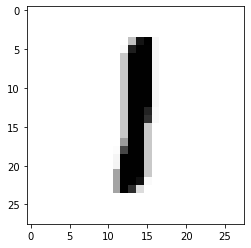

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777) # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # one_hot으로 데이터를 읽어옴

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size) # iteration : 전체 사이즈 개수 / batch size

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations # 각 batch마다 가설을 세우고 cost를 구한 다음 모든 batch의 cost의 평균을 구함

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval( # = sess.run
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    #-----------------------------------------------------------------------------------#
    # Sample image show and prediction
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

**Training epoch/batch**  


In the neural network terminology:  
- one **epoch** = one forward pass and one backward pass of all the training examples 
 (전체 데이터 셋을 한번 돈 것)  
- **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.  
- number of **iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass(we do not count the forward pass and backward pass as two different passes).


<u>Example : if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.</u>

In [32]:
### 추가
import tensorflow as tf

mnist = tf.keras.datasets.mnist
print("mnist download complete")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("normalization done")

#linear classifier
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #28 by 28 mnist input flatten
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

mnist download complete
normalization done
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 19s 311us/sample - loss: 0.7905 - acc: 0.8067
Epoch 2/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.4573 - acc: 0.8802
Epoch 3/5
60000/60000 [==============================] - 16s 275us/sample - loss: 0.4039 - acc: 0.8907 - loss: 0.4044 - a
Epoch 4/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3771 - acc: 0.8968
Epoch 5/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.3603 - acc: 0.9003
10000/10000 - 1s - loss: 0.3364 - acc: 0.9094


[0.33643503231406213, 0.9094]